In [60]:
from dotenv import load_dotenv

load_dotenv()

True

In [61]:
from typing import TypedDict

# 상태 Schema 정의 : 사용자 선호도, 추천 메뉴, 메뉴 정보
class MenuState(TypedDict):
    user_preference: str
    recommended_menu: str
    menu_info: str

In [62]:
import random

def get_user_preference(state: MenuState) -> MenuState:
    print('-- 랜덤 사용자 선호도 생성 --')
    preferences = ['육류', '해산물', '채식', '아무거나']
    preference = random.choice(preferences)
    print(f'생성된 선호도: {preference}')

    return {'user_preference': preference}

In [63]:
def recommend_menu(state: MenuState) -> MenuState:
    print('-- 메뉴 추천 --')
    preference = state['user_preference']
    if preference == '육류':
        menu = '스테이크'
    elif preference == '해산물':
        menu = '랍스터 파스타'
    elif preference == '채식':
        menu = '그린 샐러드'
    else:
        menu = '오늘의 쉐프 특선'
    
    print(f'추천 메뉴: {menu}')

    return {'recommended_menu': menu}

In [64]:
def provide_menu_info(state: MenuState) -> MenuState:
    print("---메뉴 정보 제공---")
    menu = state['recommended_menu']
    if menu == "스테이크":
        info = "최상급 소고기로 만든 juicy한 스테이크입니다. 가격: 30,000원"
    elif menu == "랍스터 파스타":
        info = "신선한 랍스터와 al dente 파스타의 조화. 가격: 28,000원"
    elif menu == "그린 샐러드":
        info = "신선한 유기농 채소로 만든 건강한 샐러드. 가격: 15,000원"
    else:
        info = "쉐프가 그날그날 엄선한 특별 요리입니다. 가격: 35,000원"
    print(f"메뉴 정보: {info}")
    return {"menu_info": info}

In [65]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(MenuState)

builder.add_node('get_user_preference', get_user_preference)
builder.add_node('recommend_menu', recommend_menu)
builder.add_node('provide_menu_info', provide_menu_info)

builder.add_edge(START, 'get_user_preference')
builder.add_edge('get_user_preference', 'recommend_menu')
builder.add_edge('recommend_menu', 'provide_menu_info')
builder.add_edge('provide_menu_info', END)

graph = builder.compile()

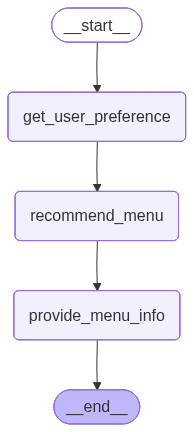

In [66]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [69]:
def print_result(result: MenuState):
    print('\n === 결과 ===')
    print('선호도: ', result['user_preference'])
    print('추천 메뉴: ', result['recommended_menu'])
    print('메뉴 정보: ', result['menu_info'])
    print('=================================')

inputs = {'user_preference': ''}

for _ in range(2):
    result = graph.invoke(inputs)
    print_result(result)
    print()

-- 랜덤 사용자 선호도 생성 --
생성된 선호도: 아무거나
-- 메뉴 추천 --
추천 메뉴: 오늘의 쉐프 특선
---메뉴 정보 제공---
메뉴 정보: 쉐프가 그날그날 엄선한 특별 요리입니다. 가격: 35,000원

 === 결과 ===
선호도:  아무거나
추천 메뉴:  오늘의 쉐프 특선
메뉴 정보:  쉐프가 그날그날 엄선한 특별 요리입니다. 가격: 35,000원

-- 랜덤 사용자 선호도 생성 --
생성된 선호도: 육류
-- 메뉴 추천 --
추천 메뉴: 스테이크
---메뉴 정보 제공---
메뉴 정보: 최상급 소고기로 만든 juicy한 스테이크입니다. 가격: 30,000원

 === 결과 ===
선호도:  육류
추천 메뉴:  스테이크
메뉴 정보:  최상급 소고기로 만든 juicy한 스테이크입니다. 가격: 30,000원



hello!! spring
